### Monty hall Paradox

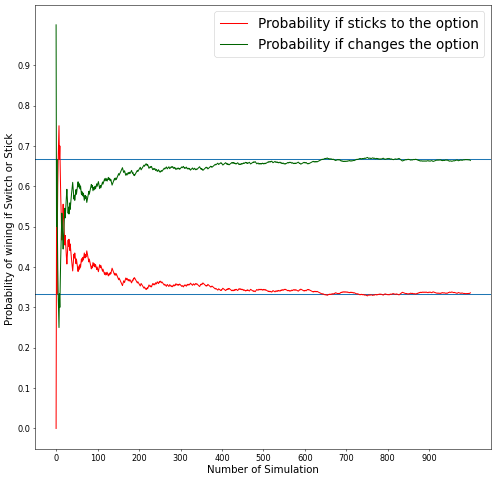


Winning probability if you always stick is:  0.336
Winning probability if you always switch is:  0.664


In [1]:
import random

X = 3 #number of doors
Y = 2 #number of goat
Z = 1 #number of cars
D = [] #Initializing an empty array for doors

#appending the doors with goat
for i in range (0,Y):
    D.append("Goat")
#appending remaining location with car
for i in range(Y,X):
    D.append("Car")

prob_stick = []   #empty array for storing prob. of sticking and
prob_switch = []   #prob of switccching
sim_count = []
#Monte carlo simulations
def monte(n):
    w_sw=0   #initialization of probability of winning if user decided to switch
    w_st =0  #initialization of probability of winning if user decided to switch
    #Random number generation
    for i in range (0,n):
        random.shuffle(D)
        choice_player = random.randint(0,X-1)

        #check if the door that player choose is car
        #if it is not car he wins if he switches his option
        if (D[choice_player] != "Car"):   #checking if he chose car or not
            w_sw = w_sw +1  #if he does not choose a car he wins only if he decided to switch to his option then we increase the counter
                                        #that count the num of possibilities in which he won if he switch his option
        else:
            w_st = w_st+1
                #if the players does not chose a car at first he should stick his option to win

        prob_stick.append(w_st/(i+1))   #prob = number of times ths player
        #wins divided by  total times they game is played(here i+1 is used as 0 corresponds to the 1st game here)
        prob_switch.append((w_sw)/(i+1)) #same applies for stick prob.
        sim_count.append(i) #to count simulation

    return prob_stick,prob_switch

prob_stick,prob_switch = monte(1000)       #call function for 1000 simulations ie. he playes for 1000 games

#plotting the graph for probability of wining if switch or stick to the option vs  no.of simulations
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12), dpi=49)
x_range = np.arange(start=0, stop=1000, step=100)
plt.rcParams['font.size'] = '20'
plt.xticks(x_range, fontsize=12, color='k')
y_range = np.arange(start=0, stop=1, step=0.1)
plt.yticks(y_range, fontsize=12, color='k')
plt.rcParams["font.serif"] = "Times New Roman NN"
plt.axhline(y = 1/3)
plt.axhline(y = 2/3)
plt.plot(sim_count,prob_stick,'red',label='Probability if sticks to the option')
plt.plot(sim_count,prob_switch,'darkgreen',label='Probability if changes the option')
plt.xlabel("Number of Simulation", fontsize=15, color='k')
plt.ylabel("Probability of wining if Switch or Stick ", fontsize=15, color='k')
plt.legend()
plt.show()

#obtaining the result.
print("\nWinning probability if you always stick is: ",prob_stick[-1])
print("Winning probability if you always switch is: ",prob_switch[-1])

### Birthday Pardox

C:\Users\iamsa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\iamsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


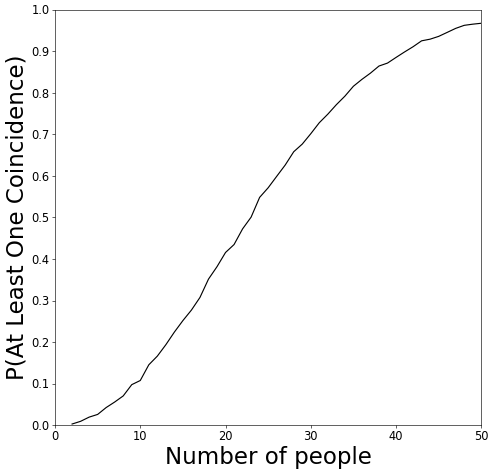

The minimum number of people required in the room for the probability to be 0.5 is :  23


In [2]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from scipy.interpolate import interp1d

#initializing some input values

max_people = 50  #Assuming maximum number of people in room as 50
min_people = 2 # obviously atleast 2 people should be there to have same birthday
simulation = 10000 # do it for 10000 simulations
max_birthday= 365 #Assuming no leap year max. possible birthdays are every day in a year
m_range = range(min_people,max_people+1)

#step 1 Random number generation

def n_rand_bday(m): #to generate n random bdays
    birthday = [] #initialise empty set to store the generated random numbers
    for i in range (0,m): #here m is the arbitary range of people
        birthday.append(random_birthday())
    return birthday

def random_birthday():
    ran_bday = randint(1,max_birthday)  #here we generate one random bday btween 1
#$and 365 which is called by the function repeatedly to generate n random
#variables
    return ran_bday

#Step 2 to find the number of common birthdays

def common_bday(birthday):
    num_bday = len(birthday) #total ways
#number of bdays that are not repeated in the list of birthdays for this we use set
#in python.
    NR_bdays = set(birthday)
    num_NR_bday = len(NR_bdays) #this is the number of birthdays not repeated in the LIST

    count =  (num_NR_bday != num_bday) # if the number of random bdays are different
#from each other then this will be false as the lenght of both sets will be same
    return count


def simulate(m):
    counter = 0
    for i in range (0,simulation): #i varries from 0 to (simulation-1)
        bday= n_rand_bday(m)  #call function to generate birthdays
        count = common_bday(bday)
        if count:
            counter = counter+1
    #to find probability
    prob_common_bday = counter/simulation
    return prob_common_bday

#step 4 now in order to find the number of people at which the probability is 0.5 we take an arbitary range m of number of people

def probfor_mrange(ks):
    prob = []
    for m in ks:
        prob_common_bday  =  simulate(m)
        prob.append(prob_common_bday)
    return prob

prob = probfor_mrange(m_range)
#plotting curves for probability(atleast one common bday) v/sNumber of people

fig, ax = plt.subplots(figsize=(10,10), dpi=55)
plt.rcParams['font.size'] = '12'

sns.lineplot(m_range, prob, color='k')

plt.xticks(fontsize=15, color='k')
y_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.yticks(y_range, fontsize=15, color='k')
plt.xlim([0, 50])
plt.ylim([0, 1])
plt.xlabel('Number of people', fontsize=30, color='k')
plt.ylabel('P(At Least One Coincidence)', fontsize=30, color='k')
plt.show()

x1=interp1d(prob,m_range) #interpolating the value corresponding to prob. of 0.5 from the graph
number=x1(0.5)
number = float(number)
print("The minimum number of people required in the room for the probability to be 0.5 is : ", round(number))